# 计 06 班中厅讲座—— Python tutorial for input method homework

大家好，这篇文档主要来分享下一些 Python 使用技巧来完成本次人智导小作业。人智导小作业本身并不复杂，按照我小学期只知道一个文件跑到底，无脑敲自己完全不懂的命令行指令也能完成，所以具体作业的一些 trick 放到文末来讲解，先结合自己的理解，介绍一些实用技能栈。

我们先从最原始的一个问题出发，Python 程序如何 debug。我们在学 DSA 的时候，debug 基本上依靠打断点加 print 的方法完成，Python 同样如此，我们也可以基于主流 IDE 来打断点，或者输出调试。然而我个人更倾向于将 IDE(pycharm) 视为一个带有代码补全功能的文本编辑器，所有的程序运行全是通过命令行执行。~~主要是我懒得操作 GUI 来配环境。~~

我来解释下为什么这么做。首先，我们大家都知道 Python 程序具有前向不可兼容性。也就是部分 Python 2 的代码可能不能在 Python 3 中运行，然后部分Python 3.3 的代码不能在 Python 3.11 中使用。当我们所写的工程越来越多之后，他们所依赖的 Python 环境会各不相同。倘若都安装在统一的Python环境当中，也就是 base 环境下，那么我们的 base 环境会非常的拥肿，而且可能会因为不同工程需要的 Python 版本库之间的不同，导致 A 工程能正常运行而 B 工程不能。所以这个时候我们就需要用 conda 来把这些不同的环境分割开来。理论上，最好为每个 Python 工程创建一个单独的 conda 环境。比如我电脑上的 conda 环境如下。

In [7]:
!source activate
!conda info -e

# conda environments:
#
base                     /Users/zhaochen20/opt/anaconda3
analysis              *  /Users/zhaochen20/opt/anaconda3/envs/analysis
torch                    /Users/zhaochen20/opt/anaconda3/envs/torch



主要是我的电脑里 conda 环境各不相同，而每次为新的工程配置好了 conda 环境后，再配置到 IDE 里比较麻烦，所以我所有的代码都是 IDE 编辑 + shell 执行。

我这么做就会遇到一个小问题，我该怎么打断点呢，听上比较麻烦，似乎没有像 C艹 一样很方便的打断点的工具。这个时候，第一个库，IPython 可以起到很大作用。

IPthon (注意大小写)是一个基于 Python Shell 的交互式解释器，但是有比默认Shell强大得多的编辑和交互功能。同时，还是一个功能强大的 Python 库。IDE 的断点功能就是依靠 IPython 的 embed 方法实现的，我这里演示下。

embed 的功能为，当运行到这一指令时，进入 IPython 交互环境，同时监测所有的变量，将所有的修改进入内存当中，退出这一环境之后再接着运行余下的程序。

In [9]:
from IPython import embed

x = 1
embed()

Python 3.8.12 (default, Oct 12 2021, 06:23:56) 
Type 'copyright', 'credits' or 'license' for more information
IPython 8.1.1 -- An enhanced Interactive Python. Type '?' for help.

In [1]: exit()



这里其实就是起到了打断点的作用，基于此，我们就可以来讨论 Python 工程 debug 的问题。
最原始的办法当然是直接跑，然后全局跑，直到出 bug，然后对着行数去 debug。关键是你一次不一定能对，这样子得反复折腾很久。甚至，你可能会跑一个特别大的程序，中途不序列化储存数据，每次重跑都会跑很久，这显然很 brute 而且低效。
我自己的 debug 方法如下：

In [1]:
from IPython import embed

try:
    x += 1
except Exception as e:
    embed()

Python 3.8.12 (default, Oct 12 2021, 06:23:56) 
Type 'copyright', 'credits' or 'license' for more information
IPython 8.1.1 -- An enhanced Interactive Python. Type '?' for help.

In [1]: e
Out[1]: NameError("name 'x' is not defined")

In [2]: exit()



每当我对某段代码感到不确定，比如担心读取 json 的时候出现解码错误，大概用这个流程：

In [ ]:
from IPython import embed

@metric
def prettify(file):
    with open(file, "r", encoding="utf-8") as f:
        try:
            meta_web = json.load(f)["html_content"]
        except Exception as e:
            print(e)
            print(file)
            embed()
            return
        soup = BeautifulSoup(meta_web, "lxml").prettify()
        with open(test_txt, "w", encoding = "utf-8") as t:
            t.write(soup)

基于这部分代码，我们能够实现读取文件，倘若文件无法去按照 json 格式读取，进入 exception 逻辑，打印出问题和出现问题的文件，进入 IPython 交互界面，根据需求查看程序执行情况，选择退出或者返回。

接下来，讲述下 jupyter notebook 的使用。实际上，这个讲义就是按照 jupyter notebook 写的，之前我一直对 jupyter 不以为然，直到最近才发现他真香。
> Jupyter Notebook 以网页的形式打开格式文件，可以在网页页面中直接编写代码和运行代码，代码的运行结果也会直接在代码块下显示的程序。如在编程过程中需要编写说明文档，可在同一个页面中直接编写，便于作及时的说明和解释。
> 同时，jupyter 能够在远端服务器启动后，在本地的浏览器编写，相当于是在 浏览器里的远端 IDE。
> 他还支持导出 tex, pdf, md 等主流文件，非常方便。

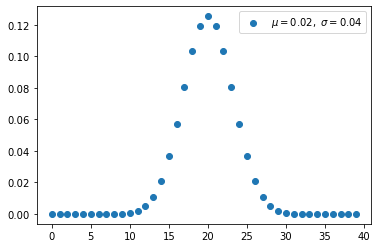

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import operator as op
from functools import reduce
def const(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom
def binomial(n, p):
    q = 1 - p
    y = [const(n, k) * (p ** k) * (q ** (n-k)) for k in range(n)]
    return y, np.mean(y), np.std(y)
for ls in [(0.5, 40)]:
    p, n_experiment = ls[0], ls[1]
    x = np.arange(n_experiment)
    y, u, s = binomial(n_experiment, p)
    plt.scatter(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
plt.legend()
plt.show()

接下来是 tqdm 和 p_tqdm，这两个库功能简单，直观易用，就是为循环加入可视化进度条，便于监视程序执行进度。

In [7]:
from tqdm import tqdm

for i in tqdm(range(10000000)):
    pass

100%|██████████████████████████| 10000000/10000000 [00:01<00:00, 6286337.35it/s]


这当我跑小型循环的时候，他当然不太需要监督进度，但是比如这次人智导要处理上千个文件，处理过程大概需要 30 分钟，故而不加入进度条，我们很难看到代码运行到了哪一步，这时候 tqdm 就会很方便。
下面是 p_tqdm，p 是 parallel 的意思。使用单个 tqdm 对于 cpu 的利用率不会很高，采用并行多线程，会显著提高效率。

In [3]:
from p_tqdm import p_map
from IPython import embed

def add(list_item, arg):
    return list_item + arg

origin_list = range(100)
try:
    results = p_map(add, origin_list, range(1, len(origin_list) + 1))
    embed()
except Exception as e:
    embed()

  0%|          | 0/100 [00:00<?, ?it/s]
Python 3.8.8 (default, Apr 13 2021, 12:59:45) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.22.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]: results
Out[1]: 
[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179,
 181,
 183,
 185,
 187,
 189,
 191,
 193,
 195,
 197,
 199]

In [2]: exit()



In [2]:
from p_tqdm import p_map

def train_each_document(document, process_id):
    """
    :param document: a json file path, containing a long string like "苟利国家生死以|美国的华莱士比你们不知道高到哪里去了|没这个能力|"
    :return: the neuron itself
    """
    neuron = Neuron()
    try:
        with open(document, "r", encoding="utf-8", errors="ignore") as f:
            contents = json.loads(f.read())
    except:
        return neuron
    string_list = contents.split("|")
    for sentence in string_list:
        neuron.train_each_sentence(sentence)
    store_path = Path.cwd() / "trans_training_result"
    if not store_path.is_dir():
        os.makedirs(store_path)
    store_name = store_path / f"{process_id}.npz"
    np.savez(store_name, neuron.one, neuron.two, neuron.three)
    return neuron

def train_total_dir(self, director):
        """
        use a director of document to train the neuron
        """
        training_list = get_list(director)
        results = p_map(train_each_document, training_list, range(1, len(training_list) + 1))
        for each in results:
            self.add_neuron(each)